# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. 

We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ads_data = pd.read_csv('advertising.csv')

In [3]:
ads_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ads_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## The Data

We got 10 features:
* Daily Time Spent on Site - consumer time on site in minutes.
* Age - cutomer age in years.
* Area Income - Avg. Income of geographical area of consumer.
* Daily Internet Usage - Avg. minutes a day consumer is on the internet.
* Ad Topic Line - Headline of the advertisement. Probably not very useful like that but maybe we could look on the length instead.
* City - City of consumer. Doesn't sound very useful, we need to check how many unique values does this feature has.
* Male - Whether or not consumer was male.
* Country - Country of consumer. Doesn't sound very useful, we need to check how many unique values does this feature has.
* Timestamp - Time at which consumer clicked on Ad or closed window. Useless.
* Clicked on Ad - 0 or 1 indicated clicking on Ad. This is what we're trying to determine in this project.

### TODO:
1. Check if we use the length of the Ad Topic Line frature instead of the actual title, we get a straight relation to Clicked on Ad.
2. use value_counts() on City and Country and estimate if it's worth keeping or not.
3. drop the Timestamp feature.

In [7]:
ads_data['Ad Topic Line'] = ads_data['Ad Topic Line'].apply(len)
ads_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,34,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,34,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,32,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,37,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,29,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Ad Topic Line'>

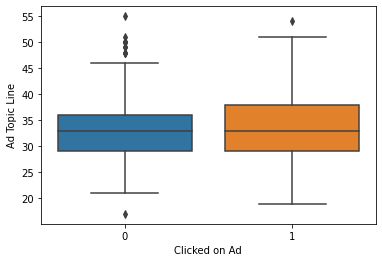

In [12]:
sns.boxplot(x='Clicked on Ad', y='Ad Topic Line', data=ads_data)

From this box plot we can see that this feature is not that significant but it still is important because we can see that most of the titles that were above 46 charecters didn't get clicked.

In [13]:
ads_data['City'].value_counts()

Lisamouth          3
Williamsport       3
New Jessicaport    2
Port Jason         2
Lake Jose          2
                  ..
New Sonialand      1
Jeremybury         1
Wagnerchester      1
New Michael        1
Brandonstad        1
Name: City, Length: 969, dtype: int64

In [14]:
ads_data['Country'].value_counts()

Czech Republic                                         9
France                                                 9
Turkey                                                 8
Liberia                                                8
Greece                                                 8
                                                      ..
Bermuda                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Aruba                                                  1
Mozambique                                             1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

As we can see from those value counts, both of the features got too many objects and therefore we will drop them along with Timestamp

In [16]:
ads_data.drop(['City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [17]:
ads_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,34,0,0
1,80.23,31,68441.85,193.77,34,1,0
2,69.47,26,59785.94,236.50,32,0,0
3,74.15,29,54806.18,245.89,37,1,0
4,68.37,35,73889.99,225.58,29,0,0


## Exploratory Data Analysis
Let's explore the data a little bit further!

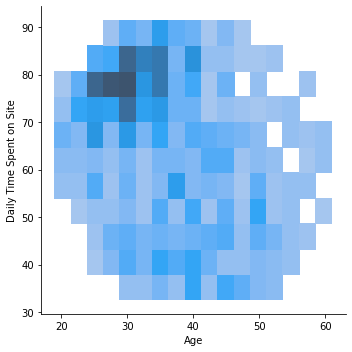

In [22]:
sns.displot(x='Age', y='Daily Time Spent on Site', data=ads_data)

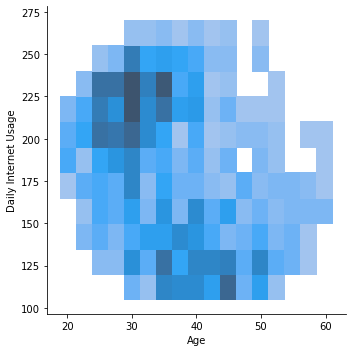

In [20]:
sns.displot(x='Age', y='Daily Internet Usage', data=ads_data)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Age'>

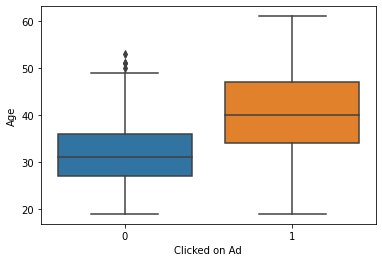

In [27]:
sns.boxplot( x='Clicked on Ad', y='Age', data=ads_data)

From the last plots we can see that people that are 25-30 years old spend more time on the site than others and it makes sense when compared to the Daily Internet Usage. But in the box plot we can clearly see that the average age for clicking ads is around 40 years old, and generally the older people tend to click ads more than the young people.

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

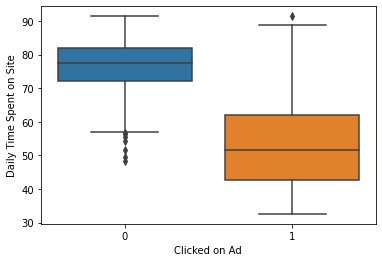

In [29]:
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=ads_data)

From this plot we learn that the less time people spend on site - the more they are likely to click the ad.

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Area Income'>

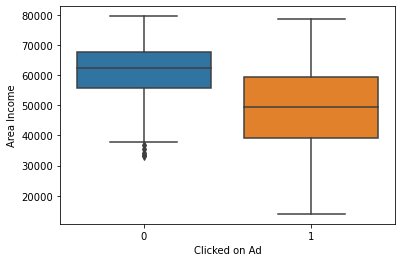

In [30]:
sns.boxplot(x='Clicked on Ad', y='Area Income', data=ads_data)

From this plot we can see that people from richer areas tend to click less on ads.

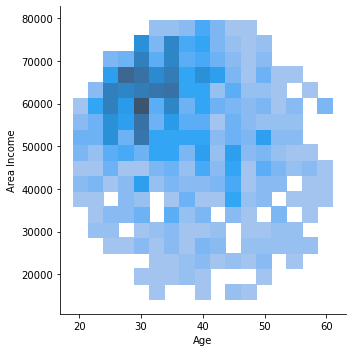

In [31]:
sns.displot(x='Age', y='Area Income', data=ads_data)

From this plot we can see that the younger people live in richer areas, which makes sense with out data analisys up to this point, because we know that younger people click less on ads and so do people from richer areas - so it makes sense that young people are living in rich areas.

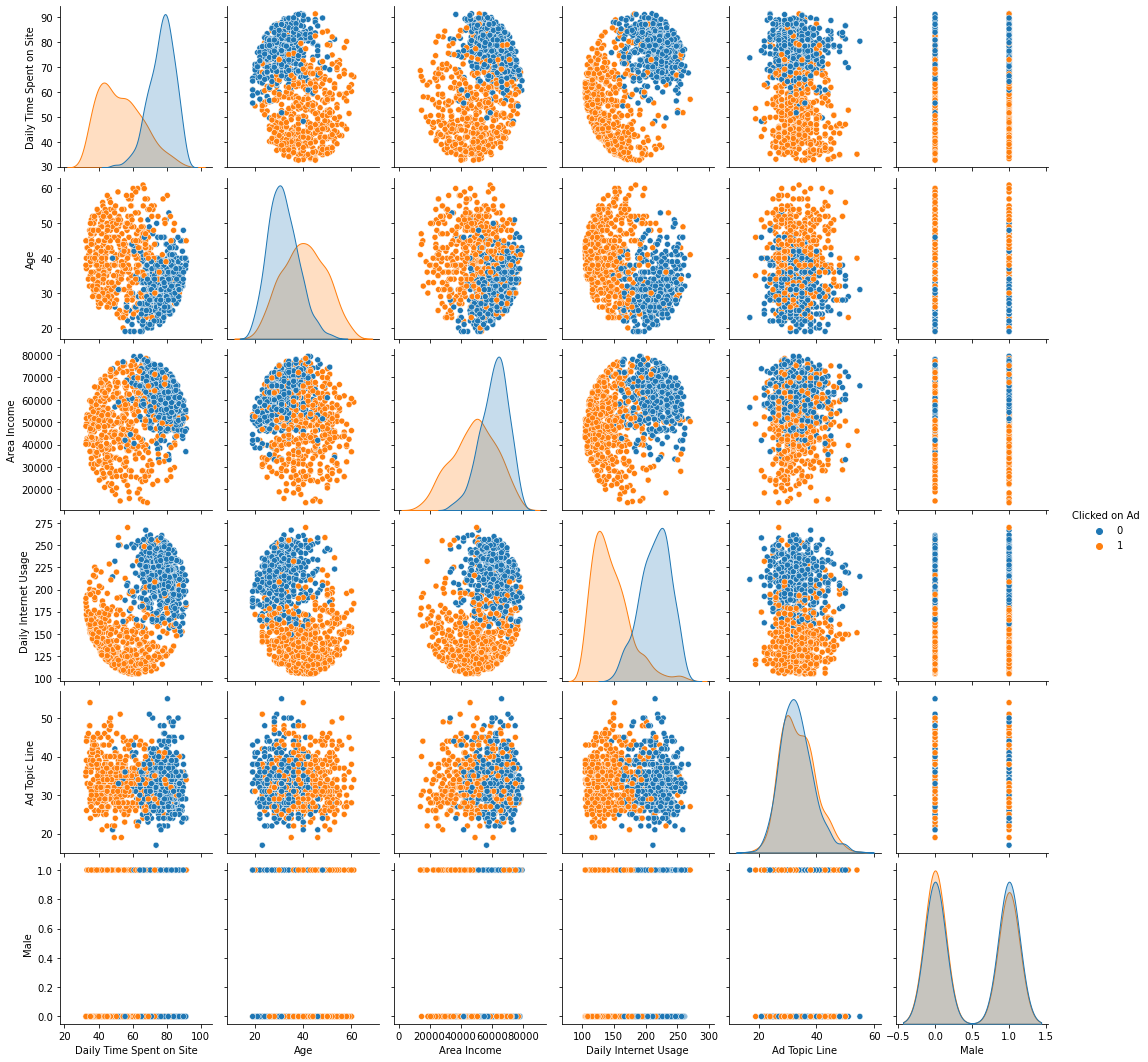

In [34]:
sns.pairplot(data=ads_data, hue='Clicked on Ad')

Before continuing to the part when we train the model, I like to do a pairplot to see that I havn't missed anything and I understand the data well enough. So now I feel comfortable with moving on to the next level.

## Training The Model

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = ads_data.drop('Clicked on Ad', axis=1)
y = ads_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr_model = LogisticRegression()

In [39]:
lr_model.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations

In [40]:
predictions = lr_model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[149   6]
 [ 16 129]]


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       155
           1       0.96      0.89      0.92       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Summary
We can see that our model did pretty good predicting the results with 93% accuracy.